In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

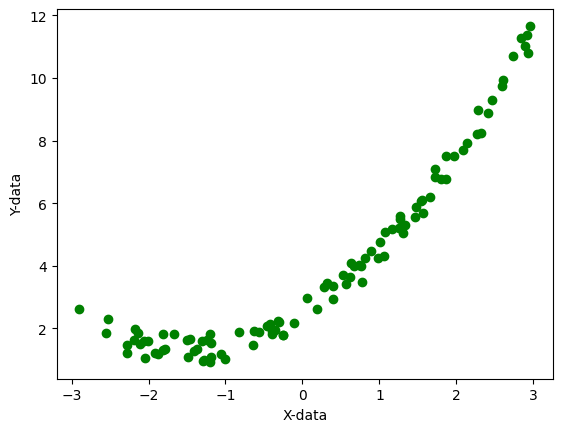

In [6]:
# Random data
X = 6 * np.random.rand(100,1) -3
y = 0.5* X**2 + 1.5*X + 2 + np.random.rand(100,1)

plt.scatter(X,y, color='green')
plt.xlabel('X-data')
plt.ylabel('Y-data')
plt.show()

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# No need for standardisation as data is already in normalised form 

In [10]:
# apply model
from sklearn.linear_model import LinearRegression
regression_1= LinearRegression()
# train model
regression_1.fit(X_train, y_train)

LinearRegression()

In [12]:
# Checking how well the model performs
from sklearn.metrics import r2_score
r_square = r2_score(y_test, regression_1.predict(X_test))
print(f"R^2 score: {r_square:.2f}")

# Accuracy is low, ie the error is quite high.

R^2 score: 0.80


Text(0, 0.5, 'Y-data')

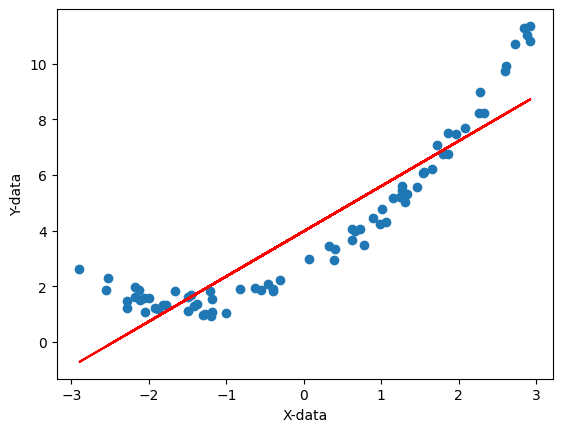

In [14]:
# Visualising the line wrt original training data
plt.plot(X_train, regression_1.predict(X_train), color='red')
plt.scatter(X_train,y_train)
plt.xlabel('X-data')
plt.ylabel('Y-data')

In [15]:
# Applying polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
regression_poly = LinearRegression()
regression_poly.fit(X_train_poly, y_train)
y_pred = regression_poly.predict(X_test_poly)

score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.2f}")       # Score improved

R^2 score: 0.99


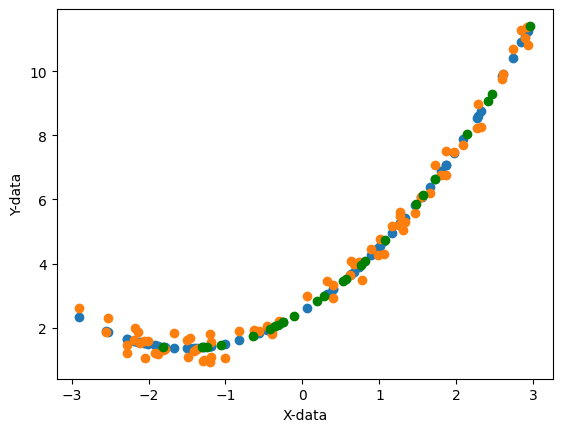

In [23]:
plt.scatter(X_train, regression_poly.predict(X_train_poly))     #These are points on the curve/line your model fits to the data.
plt.scatter(X_train,y_train)            #Shows where the data actually lies.
plt.xlabel('X-data')
plt.ylabel('Y-data')
plt.scatter(X_test, regression_poly.predict(X_test_poly), color='green', label='Test predictions')

In [25]:
# Prediction for new data points
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)

Text(0, 0.5, 'Y-data')

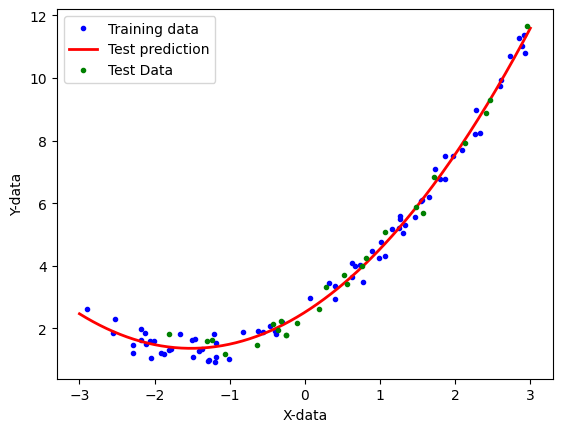

In [35]:
y_new = regression_poly.predict(X_new_poly)
plt.plot(X_train,y_train, 'b.', label='Training data')
plt.plot(X_new,y_new, 'r-', linewidth=2, label='Test prediction')
plt.plot(X_test, y_test, 'g.', label='Test Data')
plt.legend(loc='upper left')
plt.xlabel('X-data')
plt.ylabel('Y-data')

Polynomial pipeline

In the context of polynomial regression, you can use a Pipeline to combine:
PolynomialFeature transformation (to create polynomial features)
Linear regression model (to fit the transformed features)

Using Pipeline, Scikit-learn ensures that both transformations and model fitting happen in one seamless process.

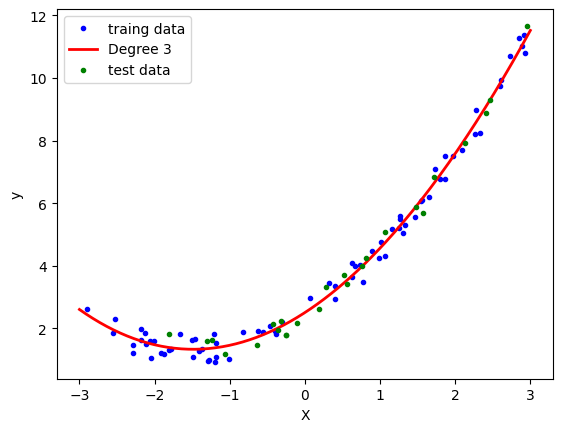

In [67]:
from sklearn.pipeline import Pipeline

def polynomial_regression(degree):
    # Create a polynomial regression model with the specified degree
    X = np.linspace(-3,3,200).reshape(-1,1)

    poly_feature = PolynomialFeatures(degree=degree, include_bias=True)
    Linear_regression = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', poly_feature),
        ('linear_regression', Linear_regression)
    ])

    polynomial_regression.fit(X_train,y_train)  # Polynomial features and fit of linear regression
    y_pred_poly = polynomial_regression.predict(X)

    plt.plot(X_train,y_train,'b.', linewidth=2, label="traing data")
    plt.plot(X,y_pred_poly,'r-', linewidth=2, label='Degree '+str(degree))
    plt.plot(X_test,y_test,'g.', label="test data")
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')

polynomial_regression(3)